# TASK 3 :  Develop a linear regression model to predict house price based on features such as the number of rooms, location, size and other relevant factors. Collect a suitable dataset from Kaggle, preprocess it, and train the model to make accurate predictions.

# Kaggle Data Set CSV FILE LINK :- https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge

# House Prediction 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")
%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")
print(f" Data loaded successfully! Shape: {df.shape}")


 Data loaded successfully! Shape: (29451, 12)


In [6]:

print("\n Dataset Information:\n")
df.info()

print("\n First 5 rows:")
display(df.head())

print("\n Summary Statistics:")
display(df.describe(include='all').T)



 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB

 First 5 rows:


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5



 Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
POSTED_BY,29451,3,Dealer,18291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNDER_CONSTRUCTION,29451.0,NaN,NaN,NaN,0.179756,0.383991,0.0,0.0,0.0,0.0,1.0
RERA,29451.0,NaN,NaN,NaN,0.317918,0.465675,0.0,0.0,0.0,1.0,1.0
BHK_NO.,29451.0,NaN,NaN,NaN,2.392279,0.879091,1.0,2.0,2.0,3.0,20.0
BHK_OR_RK,29451,2,BHK,29427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SQUARE_FT,29451.0,NaN,NaN,NaN,19802.17019,1901334.912504,3.0,900.02113,1175.05675,1550.688124,254545454.5
READY_TO_MOVE,29451.0,NaN,NaN,NaN,0.820244,0.383991,0.0,1.0,1.0,1.0,1.0
RESALE,29451.0,NaN,NaN,NaN,0.929578,0.255861,0.0,1.0,1.0,1.0,1.0
ADDRESS,29451,6899,"Zirakpur,Chandigarh",509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LONGITUDE,29451.0,NaN,NaN,NaN,21.300255,6.205306,-37.713008,18.452663,20.75,26.900926,59.912884


In [7]:
price_columns = [col for col in df.columns if 'price' in col.lower()]
if price_columns:
    target = price_columns[0]
    print(f" Target column found: '{target}'")
else:
    target = df.columns[-1]
    print(f" No column with 'price' found. Using last column: '{target}'")


 Target column found: 'TARGET(PRICE_IN_LACS)'


In [8]:
df = df[df[target].notna()]
X = df.drop(columns=[target])
y = pd.to_numeric(df[target], errors='coerce')


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (23560, 11), Test set: (5891, 11)


In [10]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f" Numeric columns: {num_cols}")
print(f" Categorical columns: {cat_cols}")


 Numeric columns: ['UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'LONGITUDE', 'LATITUDE']
 Categorical columns: ['POSTED_BY', 'BHK_OR_RK', 'ADDRESS']


In [11]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])


In [12]:
model_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', LinearRegression())
])


In [13]:
model_pipeline.fit(X_train, y_train)
print(" Model training complete!")


 Model training complete!


In [14]:
y_pred = model_pipeline.predict(X_test)


In [15]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f" R² Score (Goodness of fit): {r2:.4f}")
print(f" RMSE (Root Mean Square Error): ${rmse:,.2f}")


 R² Score (Goodness of fit): -183518850855710368.0000
 RMSE (Root Mean Square Error): $316,217,310,018.99


In [16]:

results_df = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

print(" First 10 rows of prediction results:")
print(results_df.head(10))


 First 10 rows of prediction results:
   Actual Price  Predicted Price
0          34.9     5.307227e+01
1         170.0     1.570645e+02
2          35.0     1.747656e+01
3          55.0     9.228516e+01
4          20.3    -2.065625e+01
5          27.0     1.425675e+12
6          31.0    -4.292773e+01
7          26.2    -3.750000e-01
8          50.0     5.752346e+11
9         130.0     9.931794e+11


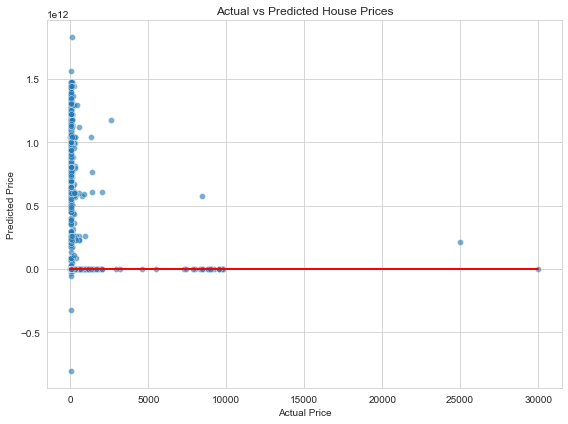

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()
